In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 01 `numpy` 的 filter

In [5]:
egg = np.array([3, -5, 10, 23, -5, 11])

In [9]:
idx = (egg >= 0)

In [10]:
idx

array([ True, False,  True,  True, False,  True])

In [11]:
egg[idx]

array([ 3, 10, 23, 11])

In [12]:
egg[egg >= 0]

array([ 3, 10, 23, 11])

In [13]:
egg[1:3]

array([-5, 10])

In [14]:
egg[2:]

array([10, 23, -5, 11])

In [15]:
egg[:-1]

array([ 3, -5, 10, 23, -5])

In [16]:
egg[5]

11

In [17]:
egg[:5]

array([ 3, -5, 10, 23, -5])

In [18]:
egg[2:-1]

array([10, 23, -5])

In [19]:
egg

array([ 3, -5, 10, 23, -5, 11])

In [20]:
egg[[True, False, True, True, False, True]]

array([ 3, 10, 23, 11])

In [21]:
egg >= 0

array([ True, False,  True,  True, False,  True])

In [22]:
egg[egg >= 0]

array([ 3, 10, 23, 11])

In [23]:
##

In [24]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x)

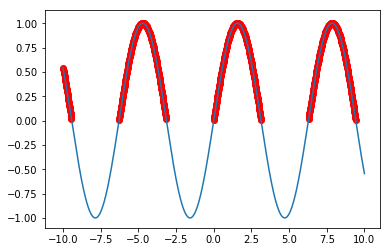

In [27]:
plt.plot(x, y)
plt.scatter(x[y>0], y[y>0], c='r')

## 02 Overfitting

In [30]:
Px = np.random.rand(6)
Py = np.random.rand(6)

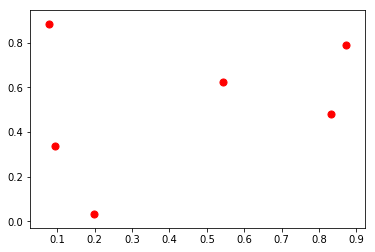

In [33]:
plt.scatter(Px, Py, c='r', s=50)

In [34]:
x = np.linspace(0, 1, 1000)

In [35]:
y = 0.5*np.sin(x) + 0.5

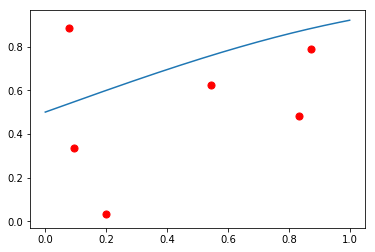

In [36]:
plt.scatter(Px, Py, c='r', s=50)
plt.plot(x, y)

In [37]:
def myplot(n=1):
    y = 0.5*np.sin(n*x) + 0.5
    plt.scatter(Px, Py, c='r', s=50)
    plt.plot(x, y)

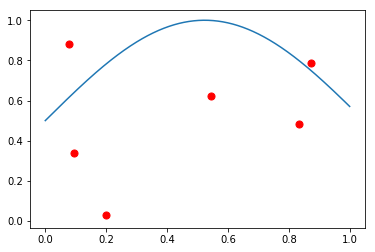

In [38]:
myplot(3)

In [39]:
from ipywidgets import interact

In [40]:
interact(myplot, n=(1, 300))

interactive(children=(IntSlider(value=1, description='n', max=300, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

## 03 線性迴歸

In [47]:
x = np.linspace(0, 5, 100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)

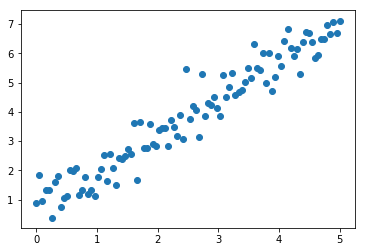

In [48]:
plt.scatter(x, y)

In [49]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [51]:
len(x_test)

20

In [52]:
len(x_train)

80

### 訓練資料格式

x = [-2, 3, -5, 2, 9]

shape 為 5 維向量

Python 喜歡

x = [[-2], [3], [-5], [2], [9]]

shape (5,1)



In [55]:
x_train.shape

(80,)

In [59]:
x_train = x_train.reshape(80, 1)
x_test = x_test.reshape(20, 1)

### step 1 開一台函數學習機

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regr = LinearRegression()

### step 2 訓練 (學習)

In [62]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### step 3 預測

In [63]:
predict = regr.predict(x_test)

In [73]:
regr.predict([[3.2]])

array([4.79024786])

In [74]:
regr.predict([[3.2], [2.09]])

array([4.79024786, 3.37345184])

In [67]:
x_test.ravel()

array([1.31313131, 4.34343434, 0.1010101 , 2.77777778, 3.78787879,
       4.6969697 , 0.80808081, 3.68686869, 2.72727273, 4.7979798 ,
       2.67676768, 4.64646465, 3.93939394, 0.65656566, 0.35353535,
       1.51515152, 1.11111111, 1.21212121, 1.66666667, 0.4040404 ])

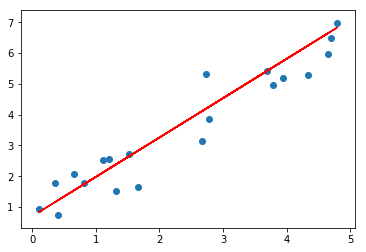

In [72]:
plt.plot(x_test.ravel(), predict, c='r')
plt.scatter(x_test.ravel(), y_test)

## 04 BOSTON 房價

In [75]:
from sklearn.datasets import load_boston

In [76]:
boston_dataset = load_boston()

In [78]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [79]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)

In [80]:
boston['MEDV'] = boston_dataset.target

In [81]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [82]:
import seaborn as sns

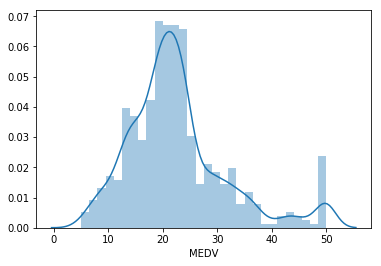

In [85]:
sns.distplot(boston.MEDV, bins=30)

In [88]:
correlation_matrix = boston.corr().round(2)

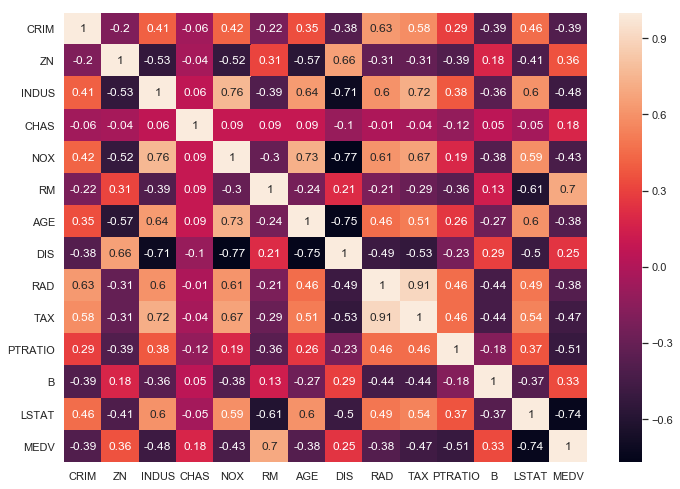

In [90]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.heatmap(correlation_matrix, annot=True)

In [91]:
X = boston.loc[:, 'CRIM':'LSTAT'].values
Y = boston.MEDV

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

### Step 1 開函數學習機

In [94]:
regr = LinearRegression()

### Step 2 fit

In [96]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step 3 predict

In [97]:
Ypred = regr.predict(x_test)

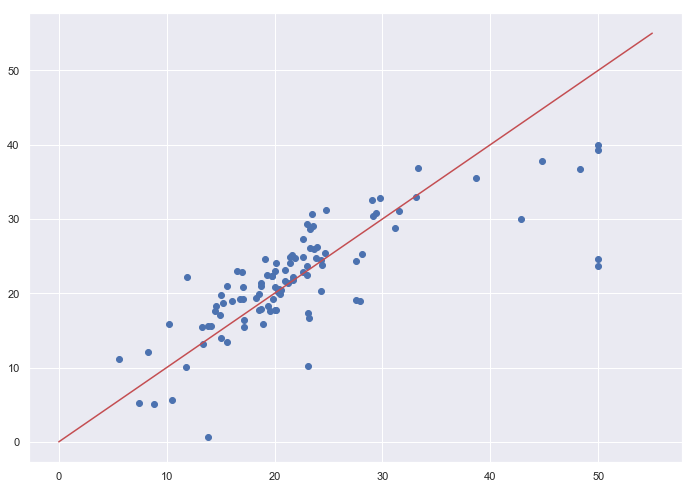

In [102]:
plt.scatter(y_test, Ypred)
plt.plot((0,55),(0,55), c='r')

In [104]:
x_train.shape

(404, 13)

## 05 SVM

In [106]:
from sklearn.datasets import load_iris

In [107]:
iris = load_iris()

In [108]:
x = iris.data
y = iris.target

In [109]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [112]:
y[87]

1

In [123]:
X = x[:, 2:]

In [124]:
Y = y

In [125]:
X[87]

array([4.4, 1.3])

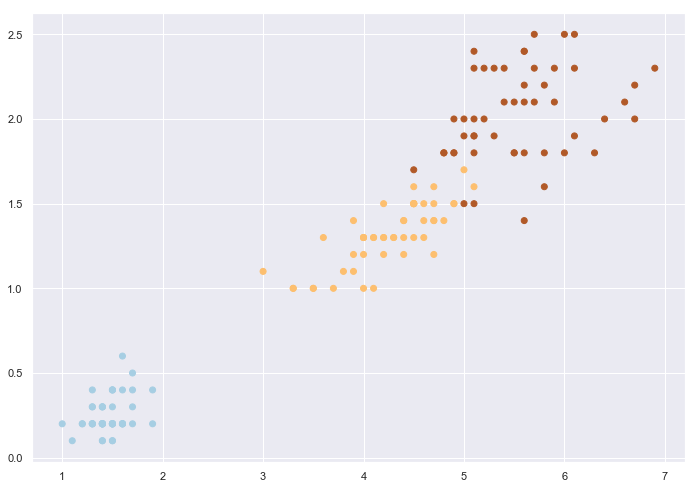

In [126]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

### Step 1. 打開函數學習機

In [129]:
from sklearn.svm import SVC

In [156]:
clf = SVC(gamma='scale')

### Step 2. 學習

In [157]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Step 3 預測

In [158]:
Ypred = clf.predict(x_test)

In [136]:
Ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [137]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

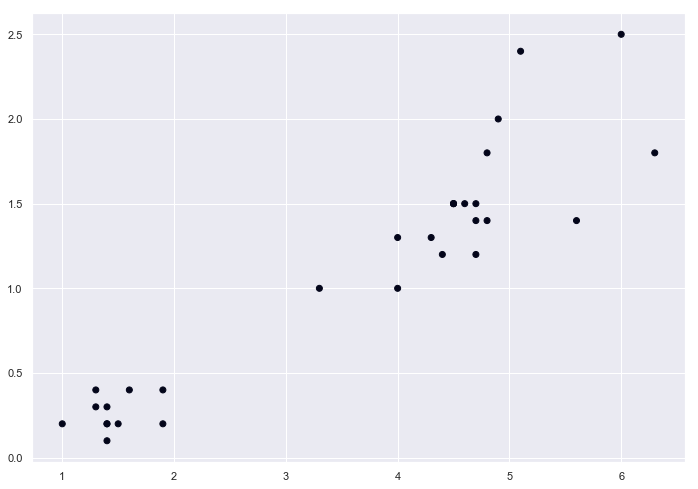

In [139]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=Ypred - y_test)

## 06 K-Means

In [140]:
x = np.random.randn(100, 2)

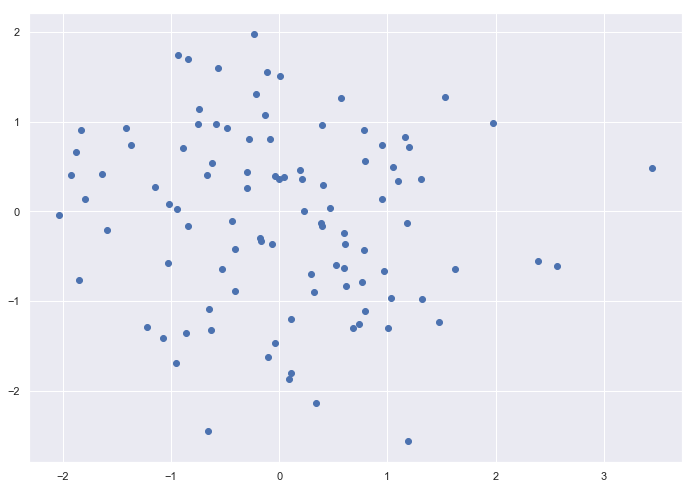

In [142]:
plt.scatter(x[:,0], x[:,1])

### Step 1 開函數學習機

In [144]:
from sklearn.cluster import KMeans

In [145]:
clf = KMeans(n_clusters=3)

### Step 2 學習

In [146]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Step 3 Predict

In [148]:
y_pred = clf.predict(x)

In [149]:
y_pred

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

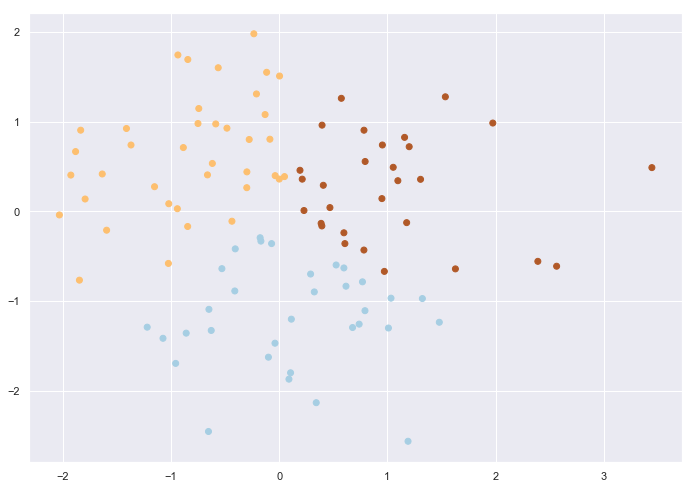

In [151]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap='Paired')

## 07 補充: `pandas` 快速爬蟲神技

我們找到的網頁, 如果發現有表格的形式, `pandas` 就有機會快速爬蟲!

In [166]:
df = pd.read_html('https://tw.stock.yahoo.com/s/list.php?c=%B9q%A4l%B9s%B2%D5%A5%F3&rr=0.19680300%201571299594',
                 encoding='big5')

這裡設了

    encoding='big5'

是因為直接爬發現有亂碼, 才注意到 Yahoo! 原來是用 Big 5。

### 看看表格有幾張

In [167]:
len(df)

5

一張張看發現...

In [168]:
df[2].head()

,選擇,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低
0,NaN,1471 首利,13:14,3.68,3.68,-,▲0.33,640,3.35,3.32,3.68,3.32
1,NaN,1582 信錦,13:30,77.10,76.90,77.1,▽0.1,163,77.20,77.30,77.30,76.80
2,NaN,2059 川湖,13:30,357.00,357.00,357.5,▽5.5,346,362.50,366.50,367.00,354.00
3,NaN,2308 台達電,14:30,134.00,133.50,134.0,△1.5,5401,132.50,132.00,134.00,131.00
4,NaN,2313 華通,14:30,40.85,40.85,40.90,▽0.45,20803,41.30,41.50,41.50,40.55


這就是我們要的!

In [170]:
df2 = df[2]

In [171]:
df2

,選擇,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低
0,NaN,1471 首利,13:14,3.68,3.68,-,▲0.33,640,3.35,3.32,3.68,3.32
1,NaN,1582 信錦,13:30,77.10,76.90,77.1,▽0.1,163,77.20,77.30,77.30,76.80
2,NaN,2059 川湖,13:30,357.00,357.00,357.5,▽5.5,346,362.50,366.50,367.00,354.00
3,NaN,2308 台達電,14:30,134.00,133.50,134.0,△1.5,5401,132.50,132.00,134.00,131.00
4,NaN,2313 華通,14:30,40.85,40.85,40.90,▽0.45,20803,41.30,41.50,41.50,40.55
5,NaN,2316 楠梓電,14:30,47.00,46.95,47.00,△0.05,2541,46.95,46.55,47.45,46.35
6,NaN,2327 國巨,14:30,310.50,310.50,311.0,△8.5,9392,302.00,302.50,311.00,299.00
7,NaN,2328 廣宇,14:30,23.40,23.40,23.45,△0.30,1816,23.10,23.10,23.45,23.00
8,NaN,2355 敬鵬,13:30,30.85,30.80,30.85,△0.15,960,30.70,30.90,30.90,30.60
9,NaN,2367 燿華,14:30,34.85,34.85,34.90,▽0.45,33325,35.30,35.05,35.60,34.75


"選擇" 那欄不要...

In [173]:
df2 = df2.drop("選擇", axis=1)

In [174]:
df2.head()

,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低
0,1471 首利,13:14,3.68,3.68,-,▲0.33,640,3.35,3.32,3.68,3.32
1,1582 信錦,13:30,77.10,76.90,77.1,▽0.1,163,77.20,77.30,77.30,76.80
2,2059 川湖,13:30,357.00,357.00,357.5,▽5.5,346,362.50,366.50,367.00,354.00
3,2308 台達電,14:30,134.00,133.50,134.0,△1.5,5401,132.50,132.00,134.00,131.00
4,2313 華通,14:30,40.85,40.85,40.90,▽0.45,20803,41.30,41.50,41.50,40.55
